<a href="https://colab.research.google.com/github/ayan-yahye/PortfolioProject/blob/main/Bank_Marketing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries imported successfully!
Dataset Shape: 45211 rows × 11 columns

First 5 rows:
             occupation  age education_level marital_status  \
0  administrative_staff   28     high_school        married   
1  administrative_staff   58    unidentified        married   
2               jobless   40     high_school       divorced   
3        retired_worker   63     high_school        married   
4        business_owner   43         college        married   

  communication_channel call_month  call_day  call_duration  call_frequency  \
0          unidentified  September         9              1               1   
1          unidentified       June         5            307               2   
2                mobile   February         4            113               1   
3                mobile      April         7             72               5   
4              landline       July        29            184               4   

  previous_campaign_outcome conversion_status  
0          

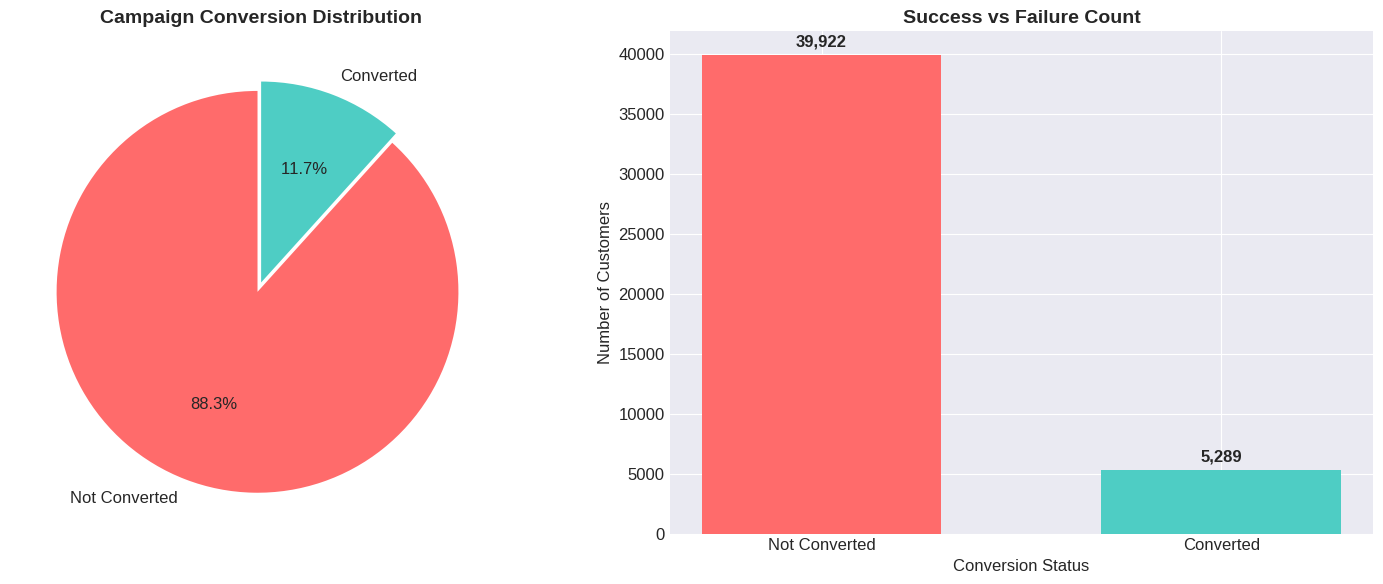


 CONVERSION RATE BY OCCUPATION:
          occupation  total  converted  rate
             student    938        269 28.68
      retired_worker   2264        516 22.79
             jobless   1303        202 15.50
           executive   9458       1301 13.76
administrative_staff   5171        631 12.20
  independent_worker   1579        187 11.84
        unidentified    288         34 11.81
technical_specialist   7597        840 11.06
      service_worker   4154        369  8.88
     domestic_worker   1240        109  8.79
      business_owner   1487        123  8.27
       manual_worker   9732        708  7.27

 KEY INSIGHTS:

 TOP 3 PERFORMING OCCUPATIONS:
   1. student: 28.68% conversion
      → +16.98% vs campaign average
      → Potential for 159 more conversions in this segment
   2. retired_worker: 22.79% conversion
      → +11.09% vs campaign average
      → Potential for 251 more conversions in this segment
   3. jobless: 15.5% conversion
      → +3.80% vs campaign average
    

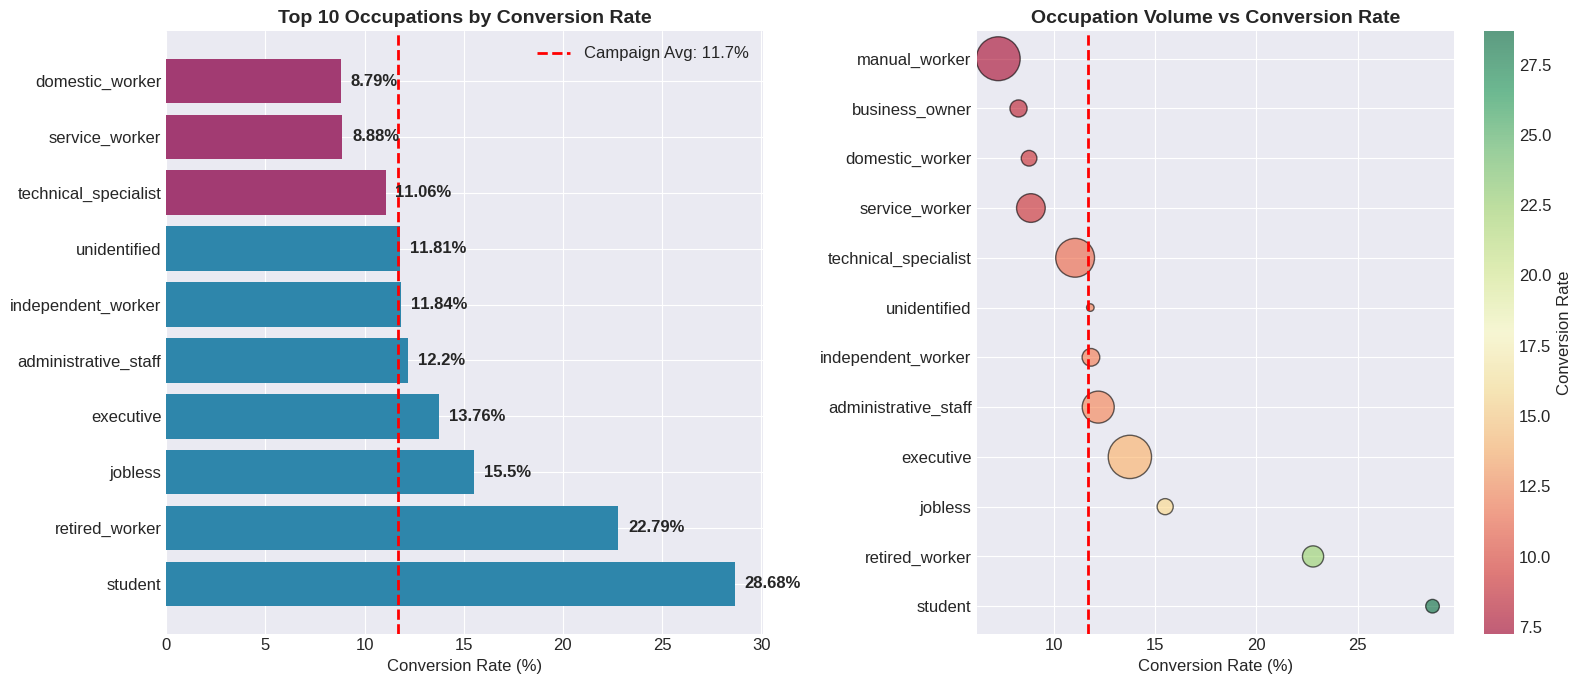

 Months found in data: ['September' 'June' 'February' 'April' 'July' 'August' 'November' 'May'
 'January' 'October' 'March' 'December']
call_month  contacts  converted  rate
     April      2932        577 19.68
    August      6247        688 11.01
  December       214        100 46.73
  February      2649        441 16.65
   January      1403        142 10.12
      July      6895        627  9.09
      June      5341        546 10.22
     March       477        248 51.99
       May     13766        925  6.72
  November      3970        403 10.15
   October       738        323 43.77
 September       579        269 46.46

 BEST MONTH: MARCH
   • Conversion Rate: 51.99%
   • Conversions: 248 out of 477 contacts

 WORST MONTH: MAY
   • Conversion Rate: 6.72%
   • Conversions: 925 out of 13766 contacts

 BEST DAY: Day 1
   • Conversion Rate: 27.95%
   • Conversions: 90.0 out of 322.0 contacts

 WORST DAY: Day 19
   • Conversion Rate: 6.94%
   • Conversions: 122.0 out of 1757.0 contacts
 

In [29]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for professional-looking charts
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# For better visualizations
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")
print("="*50)

# STEP 2: LOAD AND EXPLORE THE DATA
# Load the dataset
df = pd.read_csv('bank_marketing.csv')
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nFirst 5 rows:")
print(df.head())
print("="*50)

# STEP 3: DATA QUALITY ASSESSMENT
# Check data types and missing values
print("\n Column Information:")
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null %': (df.isnull().sum() / len(df) * 100).round(2)
})
print(df_info)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n Duplicate Rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")
print("="*50)

# STEP 4: QUESTION 1 - Overall Campaign Success Rate
# Calculate success metrics
total_customers = len(df)
converted = df[df['conversion_status'] == 'converted'].shape[0]
not_converted = df[df['conversion_status'] == 'not_converted'].shape[0]
conversion_rate = (converted / total_customers) * 100
print(f" CAMPAIGN PERFORMANCE METRICS:")
print(f"   • Total customers contacted: {total_customers:,}")
print(f"   • Customers who converted: {converted:,}")
print(f"   • Customers who did NOT convert: {not_converted:,}")
print(f"   • Overall Conversion Rate: {conversion_rate:.2f}%")
# Industry benchmark comparison (typical banking telemarketing: 8-12%)
industry_avg = 10.0
performance_vs_industry = conversion_rate - industry_avg
print(f"\n INDUSTRY COMPARISON:")
print(f"   • Industry average: {industry_avg}%")
print(f"   • Your campaign: {conversion_rate:.2f}%")
print(f"   • Performance vs industry: {performance_vs_industry:+.2f}%")

# Calculate business impact
if performance_vs_industry < 0:
    print(f"\n OPPORTUNITY GAP: Campaign is underperforming by {abs(performance_vs_industry):.2f}%")
    print(f"   → Potential to gain {abs(performance_vs_industry)/100 * total_customers:.0f} more conversions")
else:
    print(f"\n STRONG PERFORMANCE: Campaign is outperforming by {performance_vs_industry:.2f}%")

# Visualization 1: Conversion Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# Pie chart
colors = ['#FF6B6B', '#4ECDC4']
axes[0].pie([not_converted, converted], labels=['Not Converted', 'Converted'],
            autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.05, 0))
axes[0].set_title('Campaign Conversion Distribution', fontsize=14, fontweight='bold')
# Bar chart
bars = axes[1].bar(['Not Converted', 'Converted'], [not_converted, converted],
                   color=colors, width=0.6)
axes[1].set_title('Success vs Failure Count', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Customers')
axes[1].set_xlabel('Conversion Status')
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 500,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()
print("="*50)

# STEP 5: QUESTION 2 - Occupation Analysis
# Calculate conversion rates by occupation
occupation_stats = df.groupby('occupation').agg({
    'conversion_status': [
        ('total', 'count'),
        ('converted', lambda x: (x == 'converted').sum()),
        ('rate', lambda x: (x == 'converted').mean() * 100)
    ]
}).round(2)
# Flatten column names
occupation_stats.columns = ['total', 'converted', 'rate']
occupation_stats = occupation_stats.sort_values('rate', ascending=False).reset_index()

print("\n CONVERSION RATE BY OCCUPATION:")
print(occupation_stats.to_string(index=False))

# Calculate opportunity cost
overall_rate = conversion_rate
print(f"\n KEY INSIGHTS:")
# Top 3 occupations
top_3 = occupation_stats.head(3)
print(f"\n TOP 3 PERFORMING OCCUPATIONS:")
for i, row in top_3.iterrows():
    improvement = row['rate'] - overall_rate
    additional_conversions = int((row['rate']/100 - overall_rate/100) * row['total'])
    print(f"   {i+1}. {row['occupation']}: {row['rate']}% conversion")
    print(f"      → {improvement:+.2f}% vs campaign average")
    print(f"      → Potential for {additional_conversions} more conversions in this segment")
# Bottom 3 occupations
bottom_3 = occupation_stats.tail(3)
print(f"\n BOTTOM 3 OCCUPATIONS TO AVOID:")
for i, row in bottom_3.iterrows():
    loss = overall_rate - row['rate']
    wasted_calls = int((overall_rate/100 - row['rate']/100) * row['total'])
    print(f"   • {row['occupation']}: {row['rate']}% conversion")
    print(f"     → {loss:.2f}% below average ({wasted_calls} potentially wasted calls)")

# Visualization 2: Occupation Performance
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Top 10 occupations by conversion rate
top_10 = occupation_stats.head(10)
colors = ['#2E86AB' if x > overall_rate else '#A23B72' for x in top_10['rate']]
bars1 = axes[0].barh(range(len(top_10)), top_10['rate'], color=colors)
axes[0].set_yticks(range(len(top_10)))
axes[0].set_yticklabels(top_10['occupation'])
axes[0].set_xlabel('Conversion Rate (%)')
axes[0].set_title('Top 10 Occupations by Conversion Rate', fontsize=14, fontweight='bold')
axes[0].axvline(x=overall_rate, color='red', linestyle='--', linewidth=2,
                label=f'Campaign Avg: {overall_rate:.1f}%')
axes[0].legend()
# Add value labels
for i, (bar, rate) in enumerate(zip(bars1, top_10['rate'])):
    axes[0].text(rate + 0.5, i, f'{rate}%', va='center', fontweight='bold')

# Plot 2: Volume vs Conversion Rate (Bubble Chart)
bubble_sizes = occupation_stats['total'] / occupation_stats['total'].max() * 1000
scatter = axes[1].scatter(occupation_stats['rate'], range(len(occupation_stats)),
                          s=bubble_sizes, alpha=0.6, c=occupation_stats['rate'],
                          cmap='RdYlGn', edgecolors='black', linewidth=1)
axes[1].set_yticks(range(len(occupation_stats)))
axes[1].set_yticklabels(occupation_stats['occupation'])
axes[1].set_xlabel('Conversion Rate (%)')
axes[1].set_title('Occupation Volume vs Conversion Rate', fontsize=14, fontweight='bold')
axes[1].axvline(x=overall_rate, color='red', linestyle='--', linewidth=2)
plt.colorbar(scatter, ax=axes[1], label='Conversion Rate')
plt.tight_layout()
plt.show()
print("="*50)

# STEP 6: QUESTION 3 - Best Time to Contact
# Month analysis
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Check what months actually exist in your data
print(" Months found in data:", df['call_month'].unique())

# Group by month
monthly_stats = df.groupby('call_month').agg(
    contacts=('conversion_status', 'count'),
    converted=('conversion_status', lambda x: (x == 'converted').sum()),
    rate=('conversion_status', lambda x: round((x == 'converted').mean() * 100, 2))
).reset_index()

# Sort by month order (only keep months that exist in data)
monthly_stats['month_num'] = monthly_stats['call_month'].map(
    {month: i for i, month in enumerate(month_order)}
)
monthly_stats = monthly_stats.sort_values('month_num').drop('month_num', axis=1)
print(monthly_stats.to_string(index=False))

# Find best and worst months (ignoring any potential issues)
best_month_idx = monthly_stats['rate'].idxmax()
best_month = monthly_stats.loc[best_month_idx]

worst_month_idx = monthly_stats['rate'].idxmin()
worst_month = monthly_stats.loc[worst_month_idx]

print(f"\n BEST MONTH: {best_month['call_month'].upper()}")
print(f"   • Conversion Rate: {best_month['rate']}%")
print(f"   • Conversions: {best_month['converted']} out of {best_month['contacts']} contacts")

print(f"\n WORST MONTH: {worst_month['call_month'].upper()}")
print(f"   • Conversion Rate: {worst_month['rate']}%")
print(f"   • Conversions: {worst_month['converted']} out of {worst_month['contacts']} contacts")

# Day of month analysis
day_stats = df.groupby('call_day').agg(
    contacts=('conversion_status', 'count'),
    converted=('conversion_status', lambda x: (x == 'converted').sum()),
    rate=('conversion_status', lambda x: round((x == 'converted').mean() * 100, 2))
).reset_index()

# Find best and worst days
best_day = day_stats.loc[day_stats['rate'].idxmax()]
worst_day = day_stats.loc[day_stats['rate'].idxmin()]

print(f"\n BEST DAY: Day {int(best_day['call_day'])}")
print(f"   • Conversion Rate: {best_day['rate']}%")
print(f"   • Conversions: {best_day['converted']} out of {best_day['contacts']} contacts")

print(f"\n WORST DAY: Day {int(worst_day['call_day'])}")
print(f"   • Conversion Rate: {worst_day['rate']}%")
print(f"   • Conversions: {worst_day['converted']} out of {worst_day['contacts']} contacts")
print("="*50)

# STEP 7: QUESTION 4 - Call Duration Impact
# Basic duration stats
duration_stats = df.groupby('conversion_status')['call_duration'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
print(duration_stats)
# Calculate difference
conv_duration = duration_stats.loc['converted', 'mean']
not_conv_duration = duration_stats.loc['not_converted', 'mean']
duration_diff = conv_duration - not_conv_duration
duration_diff_percent = (duration_diff / not_conv_duration) * 100
print(f"   • Successful calls are {duration_diff:.0f} seconds longer on average")
print(f"   • That's {duration_diff_percent:.1f}% longer than unsuccessful calls")
# Create duration categories
df['duration_minutes'] = df['call_duration'] / 60
df['duration_category'] = pd.cut(df['duration_minutes'],
                                  bins=[0, 1, 2, 3, 5, 10, 15, 30, 60],
                                  labels=['<1min', '1-2min', '2-3min', '3-5min',
                                          '5-10min', '10-15min', '15-30min', '30+min'])
# Analyze by duration category
duration_cat_stats = df.groupby('duration_category').agg({
    'conversion_status': [
        ('total', 'count'),
        ('converted', lambda x: (x == 'converted').sum()),
        ('rate', lambda x: (x == 'converted').mean() * 100)
    ]
}).round(2)
duration_cat_stats.columns = ['total', 'converted', 'rate']
duration_cat_stats = duration_cat_stats.dropna().sort_values('rate', ascending=False)
print(duration_cat_stats)
# Find optimal duration range
optimal_duration = duration_cat_stats.iloc[0]
print(f"\ OPTIMAL CALL DURATION: {optimal_duration.name}")
print(f"   • Conversion Rate: {optimal_duration['rate']}%")
print(f"   • Sample Size: {optimal_duration['total']} calls")

# STEP 8: ADVANCED ANALYSIS - Multi-factor Impact
# Create conversion flag for easier analysis
df['converted_flag'] = (df['conversion_status'] == 'converted').astype(int)

# Get top 5 occupations
top_occupations = occupation_stats.head(5)['occupation'].tolist()
print(f" Top 5 Occupations: {top_occupations}")

# Get top 3 months
top_months = monthly_stats.nlargest(3, 'rate')['call_month'].tolist()
print(f" Top 3 Months: {top_months}")

# Filter data for top segments
top_segments = df[df['occupation'].isin(top_occupations) &
                  df['call_month'].isin(top_months)]

# Calculate segment performance
segment_converted = top_segments['converted_flag'].sum()
segment_total = len(top_segments)
segment_rate = (segment_converted / segment_total) * 100 if segment_total > 0 else 0

# Get overall rate
overall_rate = (df['converted_flag'].sum() / len(df)) * 100

print(f"\n TARGETING OPTIMIZATION:")
print(f"   • Current campaign rate: {overall_rate:.2f}%")
print(f"   • If we target ONLY top 5 occupations in top 3 months:")
print(f"   • Sample size: {segment_total} customers")
print(f"   • Projected rate: {segment_rate:.2f}%")
print(f"   • Potential improvement: {segment_rate - overall_rate:+.2f}%")










